In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import gmaps
import json
from scipy.stats import linregress

locations_df = os.path.join("Resources", "speed-camera-locations.csv")
locations_df = pd.read_csv(locations_df)
violations_df = os.path.join("Resources", "speed-camera-violations.csv")
violations_df = pd.read_csv(violations_df)
tickets_df = os.path.join("Resources", "tickets_df.csv")
boundaries = os.path.join("Resources", "Boundaries_Wards.geojson")
boundaries = json.load(open(boundaries, "r"))

In [7]:
locations_df = pd.DataFrame(locations_df)
locations_df = locations_df.dropna(how ="any")
violations_df = pd.DataFrame(violations_df)
violations_df = violations_df.dropna(how ="any")

In [8]:
#ProPublica dataset '03-'17
tickets_df = pd.read_csv(tickets_df)
keep_col = ['issue_date','violation_location', 'zipcode', 'violation_description', 'total_payments', 'year']
tickets_df = tickets_df[keep_col]
tickets_df.to_csv("newFile.csv", index=False)
tickets_df

/Users/ericnietzer/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,issue_date,violation_location,zipcode,violation_description,total_payments,year
0,2003-11-01 01:04:00,5500 S WESTERN AVE S,60629,RED LIGHT VIOLATION,90.0,2003
1,2003-11-01 01:35:00,2400 W 55TH STREET E,60632,RED LIGHT VIOLATION,190.0,2003
2,2003-11-01 02:41:00,2400 W 55TH STREET E,62901,RED LIGHT VIOLATION,180.0,2003
3,2003-11-01 05:04:00,2400 W 55TH STREET E,60638,RED LIGHT VIOLATION,90.0,2003
4,2003-11-01 06:40:00,2400 W 55TH STREET E,60632,RED LIGHT VIOLATION,90.0,2003
...,...,...,...,...,...,...
11557492,2016-12-31 23:55:00,4700 S KEDZIE AVE,605011172,RED LIGHT VIOLATION,100.0,2016
11557493,2016-12-31 23:56:00,2800 N CICERO AVENUE,60160,RED LIGHT VIOLATION,100.0,2016
11557494,2016-12-31 23:56:00,2000 W DIVISION,605613913,RED LIGHT VIOLATION,100.0,2016
11557495,2016-12-31 23:57:00,3600 N WESTERN AVENUE,601874971,RED LIGHT VIOLATION,100.0,2016


In [116]:
# Using .rename(columns={}) in order to rename columns
clean_tickets_df = tickets_df.rename(columns={"issue_date":"ISSUED", "violation_description":"VIOLATION", "total_payments":"COST"})
clean_tickets_df.head()

,ISSUED,violation_location,zipcode,VIOLATION,COST,year
0,2003-11-01 01:04:00,5500 S WESTERN AVE S,60629,RED LIGHT VIOLATION,90.0,2003
1,2003-11-01 01:35:00,2400 W 55TH STREET E,60632,RED LIGHT VIOLATION,190.0,2003
2,2003-11-01 02:41:00,2400 W 55TH STREET E,62901,RED LIGHT VIOLATION,180.0,2003
3,2003-11-01 05:04:00,2400 W 55TH STREET E,60638,RED LIGHT VIOLATION,90.0,2003
4,2003-11-01 06:40:00,2400 W 55TH STREET E,60632,RED LIGHT VIOLATION,90.0,2003


In [117]:
clean_tickets_df['COST'].value_counts()

100.00    4659594
0.00      4025739
200.00     778120
244.00     632971
90.00      514370
           ...   
504.00          1
173.33          1
173.42          1
4.48            1
38.70           1
Name: COST, Length: 26289, dtype: int64

In [127]:
clean_tickets_df['zipcode'].value_counts()

60629          84516
60148          78514
60620          78179
60639          74076
60628          67953
               ...  
613541753          1
606393296          1
537032368          1
531058720.0        1
606577777          1
Name: zipcode, Length: 991129, dtype: int64

In [130]:
vio_cost = clean_tickets_df.groupby["zipcode"]["COST"].count()
zipcode = [60629,
60148,          
60620,         
60639,         
60628]
COST = [100.00, 0.00, 200.00, 244.00, 90.00]


TypeError: 'method' object is not subscriptable

In [129]:
tic_year = pd.DataFrame({
        "Fine" : COST,
    "ZIPCODE": vio_cost
})
tic_cost.head()

ValueError: array length 5 does not match index length 991129

In [49]:
clean_tickets_df['COST'].sum()

930551673.1300008

In [50]:
clean_tickets_df['VIOLATION'].value_counts()

RED LIGHT VIOLATION                      6812751
SPEED WARNING                            2278088
SPEED VIOLATION 11+                      1931582
SPEED VIOLATION 6-10                      535075
STAND, PARK, OR OTHER USE OF BUS LANE          1
Name: VIOLATION, dtype: int64

In [106]:
df=clean_tickets_df[['LOCATION','VIOLATION','COST']]
df.head()

,LOCATION,VIOLATION,COST
0,5500 S WESTERN AVE S,RED LIGHT VIOLATION,90.00
1,2400 W 55TH STREET E,RED LIGHT VIOLATION,190.00
2,2400 W 55TH STREET E,RED LIGHT VIOLATION,180.00
3,2400 W 55TH STREET E,RED LIGHT VIOLATION,90.00
4,2400 W 55TH STREET E,RED LIGHT VIOLATION,90.00
...,...,...,...
11556872,7900 S WESTERN AVE,RED LIGHT VIOLATION,129.79
11557072,8700 S LAFAYETTE AVEN,RED LIGHT VIOLATION,239.11
11557101,500 N COLUMBUS DRIVE,RED LIGHT VIOLATION,185.62
11557248,2900 W OGDEN,SPEED VIOLATION 11+,209.32


In [107]:
ids = clean_tickets_df['VIOLATION'].unique()
len(ids)

40487

In [115]:
vio_costs = clean_tickets_df['VIOLATION'].groupby(clean_tickets_df['COST'])
vio_cost.mean().reset_index(name='Violation Costs')

AttributeError: 'SeriesGroupBy' object has no attribute 'groupby'

In [76]:
violation_group = clean_tickets_df.groupby('VIOLATION')
violation_group

In [92]:
count_viol = violation_group['VIOLATION'].count()

pd.DataFrame(count_viol)

,VIOLATION
VIOLATION,
RED LIGHT VIOLATION,6812751
SPEED VIOLATION 11+,1931582
SPEED VIOLATION 6-10,535075
SPEED WARNING,2278088
"STAND, PARK, OR OTHER USE OF BUS LANE",1


TypeError: max expected 1 argument, got 0

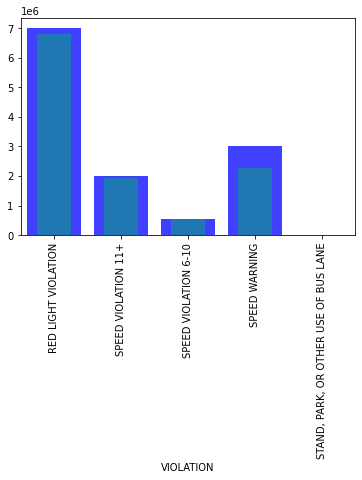

In [98]:
users = [7000000, 2000000, 540000, 3000000, 10]
x_axis = np.arange(len(users))
x_axis
plt.bar(x_axis, users, color='b', alpha=0.75, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])
plt.xlim(-1.0, len(x_axis)-0.75)
count_chart = count_viol.plot(kind='bar')
plt.ylim(1, max()+50000000)
count_chart.set_xlabel("VIOLATION")
count_chart.set_ylabel("Number of Violations")


plt.show()
plt.tight_layout()

In [102]:
group_by_violation = clean_tickets_df.groupby(["VIOLATION", "COST"])
violation_df = (clean_tickets_df["Violation Type"]).mean().reset_index()

# Convert to DataFrame
violation_df = pd.DataFrame(violation_df)

# Preview DataFrame
violation_df

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

In [14]:
violations_df.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,10318 S INDIANAPOLIS,CHI120,2019-11-21T00:00:00.000,87,1.203645e+06,1.837056e+06,41.707577,-87.529848,"{'latitude': '41.70757690291348', 'human_addre...",47.0,21202.0,49.0,705.0,47.0
1,1110 S PULASKI RD,CHI163,2019-11-21T00:00:00.000,7,1.149841e+06,1.894931e+06,41.867603,-87.725383,"{'latitude': '41.86760272243294', 'human_addre...",36.0,21572.0,30.0,98.0,14.0
3,11144 S VINCENNES,CHI023,2019-11-21T00:00:00.000,6,1.166994e+06,1.830711e+06,41.691025,-87.664248,"{'latitude': '41.69102545584918', 'human_addre...",33.0,22212.0,74.0,378.0,42.0
4,11153 S VINCENNES,CHI022,2019-11-21T00:00:00.000,4,1.167029e+06,1.830594e+06,41.690702,-87.664122,"{'latitude': '41.690701951255015', 'human_addr...",45.0,22212.0,74.0,378.0,22.0
5,1117 S PULASKI RD,CHI162,2019-11-21T00:00:00.000,5,1.149923e+06,1.894858e+06,41.867402,-87.725084,"{'latitude': '41.867401834997956', 'human_addr...",36.0,21572.0,30.0,98.0,14.0


In [15]:
df=violations_df[['CAMERA ID','VIOLATION DATE','VIOLATIONS']]
df.head()

,CAMERA ID,VIOLATION DATE,VIOLATIONS
0,CHI120,2019-11-21T00:00:00.000,87
1,CHI163,2019-11-21T00:00:00.000,7
3,CHI023,2019-11-21T00:00:00.000,6
4,CHI022,2019-11-21T00:00:00.000,4
5,CHI162,2019-11-21T00:00:00.000,5


In [16]:
ids = violations_df['CAMERA ID'].unique()
len(ids)

157

In [34]:
avg_day = df['VIOLATIONS'].groupby(df['CAMERA ID'])
avg_day.mean().reset_index(name='Avg Daily Violations')

,CAMERA ID,Avg Daily Violations
0,CHI003,107.848121
1,CHI004,34.111792
2,CHI005,11.076726
3,CHI007,58.917895
4,CHI008,18.184521
...,...,...
152,CHI180,29.851528
153,CHI181,22.268722
154,CHI182,47.682796
155,CHI183,19.406417


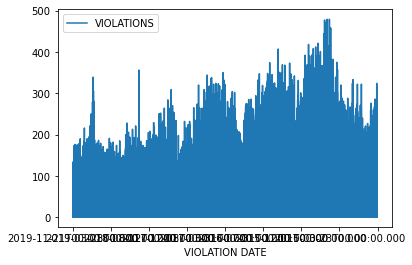

In [18]:
df.plot(kind='line',x='yea',y='VIOLATIONS')
plt.show()

In [ ]:
locations_df.head()

In [ ]:
df=locations_df[['ADDRESS','GO-LIVE DATE', 'LATITUDE', 'LONGITUDE','Wards']]
df.head()

In [ ]:
violations = pd.DataFrame(violations_df.groupby("Wards")["VIOLATIONS"].sum())
merge_df = pd.merge(violations, locations_df, on="Wards")
merge_df = merge_df[["VIOLATIONS", "ADDRESS","LATITUDE", "LONGITUDE", "Wards"]]
merge_df.head()

In [ ]:
tickets_df = pd.DataFrame(tickets_df.groupby("issue_date", "zipcode", "violation_descriipton", "total_payments"))
keep_col = ['WARD', 'ADDRESS', 'ZIPCODE', 'LOCATION']
new_ward_location_df = ward_location_df[keep_col]
new_ward_location_df.to_csv("newFile.csv", index=False)
new_ward_location_df.head()

In [ ]:
clean_df = pd.merge(merge_df, tickets_df, on="Ward Code")
clean_df.head()

In [ ]:
locations = next_merge_df[["Latitude", "Longitude"]]
locations.head()

In [ ]:
gmaps.configure(config = g_key)
speed_cams = next_merge_df["Number of Speeding Cams per Ward"].astype(float)

In [ ]:
info_box_template = """
<dl>
<dt>Ward</dt><dd>{Ward Number}</dd>
<dt>Ward Location<dd>{Navigator}</dd>
<dt>Neighborhoods<dd>{Neighborhoods}</dd>
<dt>Number of Red Light Cams</dt><dd>{Number of Red Light Cams per Ward}</dd>
<dt>Number of Speeding Violations</dt><dd>{Number of Speeding Violations per Ward}</dd>
</dl>
"""

In [ ]:
fig = gmaps.figure()
heat_map = gmaps.heatmap_layer(locations, weights= speed_cams, dissipating=False, max_intensity=1, point_radius=0.01)
fig.add_layer(heat_map)
cam_info = [info_box_template.format(**row) for index, row in new_merge_df.iterrows()]
markers = gmaps.marker_layer(locations, info_box_content= cam_info)
fig.add_layer(markers)
fig